## There are alternative solution and hits: 
### more readable
> 10, 18, 23, 24, 25, 28, 37, 38, 44, 54, 58, 60, 66, 71
### more effient (vectorlized)
> 16, 19, 24, 43, 62
### when to use it?
> 13, 26, 36, 39, 41, 58, 60, 67
### hints
> 12, 18, 22, 24, 28, 29, 30, 33, 56, 59, 66, 67, 72

In [92]:
%config Completer.use_jedi = False

# Pandas 101

In [117]:
import pandas as pd
from IPython.core.display import display

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [2]:
# 1. How to import pandas and check the version? 
print(pd.__version__)
print(pd.show_versions(as_json=True))

1.1.5
{'system': {'commit': 'b5958ee1999e9aead1938c0bba2b674378807b3d', 'python': '3.6.13.final.0', 'python-bits': 64, 'OS': 'Darwin', 'OS-release': '19.6.0', 'Version': 'Darwin Kernel Version 19.6.0: Thu Oct 29 22:56:45 PDT 2020; root:xnu-6153.141.2.2~1/RELEASE_X86_64', 'machine': 'x86_64', 'processor': 'i386', 'byteorder': 'little', 'LC_ALL': None, 'LANG': 'zh_TW.UTF-8', 'LOCALE': {'language-code': 'zh_TW', 'encoding': 'UTF-8'}}, 'dependencies': {'pandas': '1.1.5', 'numpy': '1.19.5', 'pytz': '2021.1', 'dateutil': '2.8.2', 'pip': '21.1.3', 'setuptools': '52.0.0.post20210125', 'Cython': None, 'pytest': None, 'hypothesis': None, 'sphinx': None, 'blosc': None, 'feather': None, 'xlsxwriter': None, 'lxml.etree': None, 'html5lib': '1.1', 'pymysql': None, 'psycopg2': None, 'jinja2': '3.0.1', 'IPython': '7.16.1', 'pandas_datareader': None, 'bs4': '4.9.3', 'bottleneck': None, 'fsspec': None, 'fastparquet': None, 'gcsfs': None, 'matplotlib': '3.3.4', 'numexpr': None, 'odfpy': None, 'openpyxl': 

In [3]:
# 2. How to create a series from a list, numpy array and dict?
import numpy as np
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

ser1 = pd.Series(mylist)
ser2 = pd.Series(myarr)
ser3 = pd.Series(mydict)

In [4]:
# 3. How to convert the index of a series into a column of a dataframe?
# L1
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

df = ser.to_frame().reset_index()
df.head()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


In [5]:
# 4. How to combine many series to form a dataframe?
# L1
import numpy as np
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

df = pd.concat([ser1, ser2], axis=1)
df.head()

,0,1
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


In [6]:
# 5. How to assign name to the series’ index?
# L1
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

ser.name = 'alphabets'

In [7]:
# 6. How to get the items of series A not present in series B?
# L2
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

mask = ~ ser1.isin(ser2)
ser1[mask]

0    1
1    2
2    3
dtype: int64

In [8]:
# 7. How to get the items not common to both series A and series B?
# L2
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

union_ser = pd.Series(np.union1d(ser1, ser2))
intersection_ser = pd.Series(np.intersect1d(ser1, ser2))
xor_ser = union_ser[~ union_ser.isin(intersection_ser)]
xor_ser

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64

In [9]:
# 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?
# L2
ser = pd.Series(np.random.normal(10, 5, 25))
ser.quantile([.0, .25, .5, .75, 1])

0.00     2.970719
0.25     7.652456
0.50     9.878591
0.75    12.801963
1.00    22.928323
dtype: float64

In [10]:
# 9. How to get frequency counts of unique items of a series?
#  L1
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
ser.value_counts()

h    6
f    5
c    5
a    5
e    3
g    3
d    2
b    1
dtype: int64

In [11]:
# 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?
# L2
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))

# More Readable
top_2_frequent = ser.value_counts().nlargest(2).index
ser.where(ser.isin(top_2_frequent), other='Other')

0     Other
1     Other
2         4
3     Other
4         2
5         4
6         2
7         4
8     Other
9         2
10        2
11        2
dtype: object

In [12]:
#  11. How to bin a numeric series to 10 groups of equal size?
#  L2
ser = pd.Series(np.random.random(20))

pd.qcut(ser,
        q = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
        labels=['1st', '2nd','3rd','4th','5th',
                 '6th', '7th', '8th','9th', '10th'])

# hint 
# 使用qcut輸出的series, dtype為categorical, 各個value之間可以進行比較

0      4th
1      7th
2      3rd
3      2nd
4      1st
5      3rd
6      8th
7      5th
8      9th
9      5th
10    10th
11     2nd
12     7th
13     4th
14     6th
15     1st
16    10th
17     9th
18     6th
19     8th
dtype: category
Categories (10, object): ['1st' < '2nd' < '3rd' < '4th' ... '7th' < '8th' < '9th' < '10th']

In [13]:
# 12. How to convert a numpy array to a dataframe of given shape? (L1)
# L1
ser = pd.Series(np.random.randint(1, 10, 35))


pd.DataFrame(ser.values.reshape(7,-1))
# hint
# 參數 -1 --> 處理好剩下的dimension，在此例中，(7,-1) --> (7, 35/7)

,0,1,2,3,4
0,3,9,3,2,8
1,9,1,2,5,5
2,6,2,9,3,3
3,9,5,6,4,5
4,6,4,2,2,3
5,9,1,3,4,7
6,1,1,5,6,7


In [14]:
# 13. How to find the positions of numbers that are multiples of 3 from a series?
# L2
ser = pd.Series(np.random.randint(1, 10, 7))



# np.argwhere(ser % 3 == 0)

# hint
# np.where, pd.where 傳回整個series
# np.argwhere 傳回index

In [15]:
# 14. How to extract items at given positions from a series
# L1
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

ser.iloc[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [16]:
# 15. How to stack two series vertically and horizontally ?
# Difficulty Level: L1
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

df1 = pd.concat([ser1,ser2], axis='index').to_frame()
df2 = pd.concat([ser1,ser2], axis='columns')
display(df1.head(), df2)

,0
0,0
1,1
2,2
3,3
4,4


,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [17]:
# 16. How to get the positions of items of series A in another series B?
# Difficulty Level: L2
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

# vectorlized
mask = ser1.isin(ser2)
np.argwhere(mask.values).reshape(-1).tolist()

# np.where進行項量化的操作, 在資料量大時可以保證一定的速度

[0, 4, 5, 8]

In [18]:
# 17. How to compute the mean squared error on a truth and predicted series?
# Difficulty Level: L2
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

print((truth - pred).pow(2).sum() / len(truth))
print(np.mean((truth - pred) ** 2))

0.359778780278481
0.359778780278481


In [19]:
# 18. How to convert the first character of each element in a series to uppercase?
# Difficulty Level: L2
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

# More readable
ser.str.capitalize()
# Hints
# 使用dir來得到所有 ser.str中的屬性及方法
# 如此一來可以更全面的了解有什麼屬性及方法可以call
# print(dir(ser.str))

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [20]:
# 19. How to calculate the number of characters in each word in a series?
# Difficulty Level: L2
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

# vectorlzied

ser.str.len()

0    3
1    2
2    4
3    4
dtype: int64

In [21]:
# 20. How to compute difference of differences between consequtive numbers of a series?
# Difficulty Level: L1
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

# Solition 1
tmp = ser.shift(1)
middle_result = ser - tmp
print(middle_result.tolist())
tmp2 = middle_result.shift(1)
print((middle_result - tmp2).tolist())

# Solution 2
print('-'*60)
print(ser.diff().tolist())
print(ser.diff().diff().tolist())

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]
------------------------------------------------------------
[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]


In [22]:
# 21. How to convert a series of date-strings to a timeseries?
# Difficiulty Level: L2

ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

pd.to_datetime(ser, infer_datetime_format=True)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

In [23]:
# 22. How to get the day of month, week number, day of year and day of week from a series of date strings?
# Difficiulty Level: L2

ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

tmp = pd.to_datetime(ser)

# hint
# 使用 dir(tmp.dt) 來確認有什麼屬性/方法可以call
# tmp.dt為pandas.core.indexes.accessors.DatetimeProperties 物件
# 使用dir(tmp[0])  來確認有什麼屬性/方法可以call
# tmp[0]為<class 'pandas._libs.tslibs.timestamps.Timestamp'> 物件
#  pandas timestamp文件
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html
#  dateutil 文件，處理時間資料時非常常用
# https://dateutil.readthedocs.io/en/stable/index.html



Date = tmp.dt.day.tolist()
Week_number = tmp.dt.weekofyear.tolist()
Day_num_of_year = tmp.dt.dayofyear.tolist()
Dayofweek = tmp.dt.weekday.tolist()

print(f''' 
Date : {Date}
Week number : {Week_number}
Day num of year : {Day_num_of_year}
Day of week : {Dayofweek}
''')

 
Date : [1, 2, 3, 4, 5, 6]
Week number : [53, 5, 9, 14, 19, 23]
Day num of year : [1, 33, 63, 94, 125, 157]
Day of week : [4, 2, 5, 3, 0, 5]



/Users/yulongtsai/opt/miniconda3/envs/py36_tf21/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [24]:
# 23. How to convert year-month string to dates corresponding to the 4th day of the month?
# Difficiulty Level: L2
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

# more readable
pd.to_datetime(ser, infer_datetime_format=True)

0   2010-01-01
1   2011-02-01
2   2012-03-01
dtype: datetime64[ns]

In [25]:
# 24. How to filter words that contain atleast 2 vowels from a series?
# Difficiulty Level: L3

ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])


# more readable
# vectorlized
condition = ser.str.count('[aeiouAEIOU]') >= 2
ser[condition]

0     Apple
1    Orange
4     Money
dtype: object

* hint
    * <img src = "./images/RegExp_snap.png"></img>
    * pandas中的Series.str方法是向量化的，且通常都支援正則表達式(RegExp)
    * 正則表達式可以幫助我們處理很多文字問題
    * 像圖中的[aeiou]搭配[AEIUO] --> [aeiuoAEIUO]就解決了此題
    * 或許你會想看看這份在[菜鳥上的教學](http://www.runoob.com/python/python-reg-expressions.html)

In [26]:
# 25. How to filter valid emails from a series?
# Difficiulty Level: L3

# Extract the valid emails from the series emails. The regex pattern for valid emails is provided as reference.

emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

# More readable
condition = emails.str.contains(pattern)
emails[condition].tolist()

['rameses@egypt.com', 'matt@t.co', 'narendra@modi.com']

In [27]:
# 26. How to get the mean of a series grouped by another series?
# Difficiulty Level: L2
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))
print(weights.tolist())
print(fruit.tolist())

print()
print(weights.groupby(fruit).mean())

# ALTERNATIVE SULOTION
tmp = pd.DataFrame({'fruit':fruit, 
              'weights':weights}).groupby('fruit').mean()

tmp['weights'].index.name = ''
print(tmp['weights'])

# When to use?
# 操作dataframe時我們通常都直接在dataframe裡面groupby, 這題告訴我們
# series 可以 groupby 另一條series, 之間用index作為對應, 
# 這讓feature engineering時能夠有更好的彈性

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
['carrot', 'apple', 'banana', 'carrot', 'banana', 'carrot', 'apple', 'carrot', 'banana', 'carrot']

apple     4.500000
banana    5.666667
carrot    5.800000
dtype: float64

apple     4.500000
banana    5.666667
carrot    5.800000
Name: weights, dtype: float64


In [28]:
# 27. How to compute the euclidean distance between two series?
# Difficiulty Level: L2

p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

sum((p - q) ** 2) ** 0.5

18.16590212458495

In [29]:
# # 28. How to find all the local maxima (or peaks) in a numeric series?
# # Difficiulty Level: L3

# # Get the positions of peaks (values surrounded by smaller values on both sides) in ser.

# ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

# # more readable
# peak_locs = np.argwhere(np.sign(ser.diff(1)) +\
#                         np.sign(ser.diff(-1)) == 2).reshape(-1) 

# # hint
# # 使用diff(-1)，來取得backward
# # 同樣性質的方法還有pd.Series.shift
# peak_locs

In [30]:
# 29. How to replace missing spaces in a string with the least frequent character?
# Replace the spaces in my_str with the least frequent character.

# Difficiulty Level: L2

# hint 
# 此例示範了如何將所有series中的string coacat在一起

ser = pd.Series(list('dbc deb abed gade'))
freq = ser.value_counts()
print(freq)
least_freq = freq.dropna().index[-1]
result = "".join(ser.replace(' ', least_freq))
print(result)

# ALTERNATIVE SOLUTION
my_str = 'dbc deb abed gade'

least_freq_character = pd.Series(list(my_str)).value_counts().index[-1]

my_str.replace(' ', least_freq_character)

d    4
e    3
     3
b    3
a    2
g    1
c    1
dtype: int64
dbccdebcabedcgade


'dbccdebcabedcgade'

In [31]:
# 30. How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays) after that having random numbers as values?
# Difficiulty Level: L2
dateime_idx = pd.date_range('2000-01-01', periods=10, freq='W-SAT')

pd.Series(index = dateime_idx,
          data = np.random.randint(2,8,size=len(dateime_idx)))
# hint 
# 要在pandas中找到pd.date_range這個方法實在很難找......
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

2000-01-01    5
2000-01-08    2
2000-01-15    3
2000-01-22    7
2000-01-29    6
2000-02-05    4
2000-02-12    4
2000-02-19    4
2000-02-26    5
2000-03-04    5
Freq: W-SAT, dtype: int64

In [32]:
# 30 - 2
# create date index / date column - with dataframe length
from datetime import datetime, timedelta

data = np.random.randint(2, 8, size=100)

date_start = datetime(2018, 1, 1)
days = pd.date_range(date_start,
                     date_start + timedelta(len(data) - 1),
                     freq='D') # sart, end, freq



# days = pd.date_range('2018-01-01', periods=1, freq='D')
df = pd.DataFrame({'value':data,'date':days})

display(df.head(),
       df.dtypes,
       df.set_index('date'))

,value,date
0,3,2018-01-01
1,4,2018-01-02
2,2,2018-01-03
3,7,2018-01-04
4,3,2018-01-05


value             int64
date     datetime64[ns]
dtype: object

,value
date,
2018-01-01,3
2018-01-02,4
2018-01-03,2
2018-01-04,7
2018-01-05,3
...,...
2018-04-06,4
2018-04-07,2
2018-04-08,6


In [33]:
# 31. How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?
# Difficiulty Level: L2

ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))

# Fill the datetime index using resample + ffill()
ser.resample('D').ffill()

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

In [34]:
# 32. How to compute the autocorrelations of a numeric series?
# Difficiulty Level: L3

# Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.

ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))

# ALTERNATIVE　SOLUTION
tmp = pd.Series([abs(ser.autocorr(lag)) for lag in range(1,11)])
tmp.sort_values(ascending=False).head(1)

5    0.639555
dtype: float64

In [35]:
# 33. How to import only every nth row from a csv file to create a dataframe?
# Difficiulty Level: L2

# Import every 50th row of BostonHousing dataset as a dataframe.
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'



df = pd.read_csv(url, chunksize=50)

df_result = pd.concat([chunk.iloc[0] for chunk in df], axis=1)

df_result.T
# Hint
# pd.read_csv(**param, chunksize=50)
# 會return TextFileReader物件, 是可遞迴物件
# 可以經由以下確認
# print(type(df))

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4


In [36]:
# 34. How to change column values when importing csv to a dataframe?
# Difficulty Level: L2

# Import the boston housing dataset, but while importing change the 'medv' (median house value) column so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
converters = {'medv': lambda x :'High' if float(x) > 25
                                       else 'Low'}
df = pd.read_csv(url, converters=converters)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High


In [37]:
# 35. How to create a dataframe with rows as strides from a given series?
# Difficiulty Level: L3

L = pd.Series(range(15))

def gen_strides(a, stride_len=5, window_len=5):
    n_strides = ((a.size-window_len)//stride_len) + 1
    return np.array([a[s:(s+window_len)] for s in np.arange(0, a.size, stride_len)[:n_strides]])

gen_strides(L, stride_len=2, window_len=4)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

In [38]:
# 36. How to import only specified columns from a csv file?
# Difficulty Level: L1

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
cols = ['crim','medv']
pd.read_csv(url, usecols=cols).head()

# When to use
# 資料量大時，硬體記憶體不足，只讀取幾個column做特徵工程
# 並存取特徵結果

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2


In [39]:
# 37. How to get the nrows, ncolumns, datatype, summary stats of each column of a dataframe? Also get the array and list equivalent.
# Difficulty Level: L2
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
df = pd.read_csv(url)

# More readable
display(
df.shape,
df.dtypes,
df.describe()
)
# get np.array and list
array = df.values
df_list = df.values.tolist()

(93, 27)

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway           float64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
Origin                 object
Make                   object
dtype: object

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [40]:
# # 38. How to extract the row and column number of a particular cell with given criterion?
# # Difficulty Level: L1

# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# # More Readable
# highest_price = df['Price'].max()
# # the dataframe rows
# df.query(f'Price == {highest_price}')
# # the row idx and col idx
# row, col = np.argwhere(df.values == np.max(df.Price)).reshape(-1)
# print(row, col)

In [41]:
# # 39. How to rename a specific columns in a dataframe?
# # Difficulty Level: L2

# # Rename the column Type as CarType in df and replace the ‘.’ in column names with ‘_’.
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# tmp = [col.replace('.','_') for col in df.columns]
# df.columns = tmp
# df = df.rename(columns={'Type':'CarType'})
# df.columns

# # When to use
# # 第一次拿到資料時，針對特徵欄位做資料清理
# # 甚至會加註categorical feature CAT_FeatureName
# # Numerical feature Num_FeatureName......等

In [42]:
# # 40. How to check if a dataframe has any missing values?
# # Difficulty Level: L1
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# df.isnull().any().any()

In [43]:
# # 41. How to count the number of missing values in each column?
# # Difficulty Level: L2
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# nan_p_series = df.isnull().sum() / len(df)
# nan_p_series.sort_values(ascending=False).head(1)

# # when to use
# # 缺失值統計，近乎每次必用

In [44]:
# # 42. How to replace missing values of multiple numeric columns with the mean?
# # Difficulty Level: L2

# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# for col in ['Min.Price','Max.Price']:
#     respective_mean = df[col].mean()
#     df[col] = df[col].fillna(respective_mean)

# df[['Min.Price','Max.Price']].isnull().any().any()

In [45]:
# # 43. How to use apply function on existing columns with global variables as additional arguments?
# # Difficulty Level: L3

# # In df, use apply method to replace the missing values in Min.Price with the column’s mean and those in Max.Price with the column’s median.

# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# d = {'Min.Price': np.nanmean, 'Max.Price': np.nanmedian}
# df[['Min.Price', 'Max.Price']] = df[['Min.Price', 'Max.Price']]\
# .apply(lambda x, d: x.fillna(d[x.name](x)), args=(d, ))

# # Vectorlized 
# # 使用 42題的方式，改成median填入，是向量化操作
# # 在資料量大時會快非常多

In [46]:
# 44. How to select a specific column from a dataframe as a dataframe instead of a series?
# Difficulty Level: L2

df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))

# More readable

df[['a']]

,a
0,0
1,5
2,10
3,15


In [47]:
# 45. How to change the order of columns of a dataframe?
# Difficulty Level: L3
# Actually 3 questions.

# In df, interchange columns 'a' and 'c'.
# Create a generic function to interchange two columns, without hardcoding column names.

# Sort the columns in reverse alphabetical order, that is colume 'e' first through column 'a' last.

df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))

# 1
df[list('cbade')]

# 2 
# no function to do that
def swap_col(df, col1, col2):
    df_swap = df.copy()
    col_list = list(df_swap.columns)
    col1_idx = col_list.index(col1)
    col2_idx = col_list.index(col2)
    col_list[col1_idx] = col2
    col_list[col2_idx] = col1
    
    return df_swap[col_list]

swap_col(df, 'c','e')

# 3
new_order = sorted(list(df.columns), reverse=True)
df[new_order]

,e,d,c,b,a
0,4,3,2,1,0
1,9,8,7,6,5
2,14,13,12,11,10
3,19,18,17,16,15


In [48]:
# 46. How to set the number of rows and columns displayed in the output?
# Difficulty Level: L2

# Change the pamdas display settings on printing the dataframe df it shows a maximum of 10 rows and 10 columns.

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
# 找到所有可用的set_option
# pd.describe_option()
pd.set_option('display.max_columns', 10) 
pd.set_option('display.max_rows', 10) 
df

,Manufacturer,Model,Type,Min.Price,Price,...,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,...,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,...,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,...,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,...,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,...,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,...,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,...,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,...,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,...,29.5,14.0,2985.0,non-USA,Volvo 240


In [49]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [50]:
# 47. How to format or suppress scientific notations in a pandas dataframe?
# Difficulty Level: L2

# Suppress scientific notations like ‘e-03’ in df and print upto 4 numbers after decimal.
df = pd.DataFrame(np.random.random(4)**10, columns=['random'])


pd.options.display.float_format = '{:,.4f}'.format

display(df)

# undo
pd.options.display.float_format = None

,random
0,0.0000
1,0.7622
2,0.0234
3,0.3178


In [51]:
# 48. How to format all the values in a dataframe as percentages?
# Difficulty Level: L2

# Format the values in column 'random' of df as percentages.

df = pd.DataFrame(np.random.random(4), columns=['random'])


df.style.format({'random':'{0:.2%}'.format,})

,random
0,30.13%
1,31.37%
2,60.00%
3,11.09%


In [52]:
# # 49. How to filter every nth row in a dataframe?
# # Difficulty Level: L1

# # From df, filter the 'Manufacturer', 'Model' and 'Type' for every 20th row starting from 1st (row 0).

# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# # More readable

# idx = np.arange(0, df.shape[0], step=20i)
# col = ['Manufacturer','Model','Type']
# df[col].iloc[idx]

In [53]:
# # 50. How to create a primary key index by combining relevant columns?
# # Difficulty Level: L2

# # In df, Replace NaNs with ‘missing’ in columns 'Manufacturer', 'Model' and 'Type' 
# # and create a index as a combination of these three columns and check if the index is a primary key.

# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv', usecols=[0,1,2,3,5])

# col = ['Manufacturer','Model','Type']
# idx_col = '.Price'
# df[col] = df[col].fillna('missing')
# df.index = df.Manufacturer + '_' + df.Model + '_' + df.Type
# display(df.head(),
#        df.index.is_unique)
# # When to use
# # 根據column內容來設置 Primary key的手法非常實用
# # 容易給其他同事進行表格閱讀

In [54]:
# 51. How to get the row number of the nth largest value in a column?
# Difficulty Level: L2
# Find the row position of the 5th largest value of column 'a' in df.
df = pd.DataFrame(np.random.randint(1, 30, 30).reshape(10,-1), columns=list('abc'))

# More readable

df['a'].nlargest().index[-1]

4

In [55]:
# 52. How to find the position of the nth largest value greater than a given value?
# Difficulty Level: L2

# In ser, find the position of the 2nd largest value greater than the mean.

# More readable
ser = pd.Series(np.random.randint(1, 100, 15))

tmp = ser - ser.mean()

tmp.nlargest(2).index

Int64Index([11, 10], dtype='int64')

In [56]:
# 53. How to get the last n rows of a dataframe with row RowSum > 100?
# Difficulty Level: L2

# Get the last two rows of df whose row RowSum is greater than 100.
df = pd.DataFrame(np.random.randint(10, 40, 60).reshape(-1, 4))

# More readable
df['RowSum'] = df.sum(axis=1)
df.query('RowSum > 100').tail(2)

,0,1,2,3,RowSum
10,15,38,17,39,109
14,39,31,18,21,109


In [57]:
# 54. How to find and cap outliers from a series or dataframe column?
# Difficulty Level: L2

# Replace all values of ser in the lower 5%ile and greater than 95%ile with respective 5th and 95th %ile value.

# More readable
ser = pd.Series(np.logspace(-2, 2, 30))
low = np.quantile(ser, q=.05)
high = np.quantile(ser, q=.95)
ser.clip(low, high)

0      0.016049
1      0.016049
2      0.018874
3      0.025929
4      0.035622
        ...    
25    28.072162
26    38.566204
27    52.983169
28    63.876672
29    63.876672
Length: 30, dtype: float64

In [58]:
# 55. How to reshape a dataframe to the largest possible square after removing the negative values?

# Difficulty Level: L3

# Reshape df to the largest possible square with negative values removed.
# Drop the smallest values if need be. 
# The order of the positive numbers in the result should remain the same as the original.

df = pd.DataFrame(np.random.randint(-20, 50, 100).reshape(10,-1))
display(df)
def larget_square(df):
    tmp = df.copy()
    # get positive array
    arr = tmp[tmp > 0].values
    arr = arr[~ np.isnan(arr)]
    # get largest square of side
    N = np.floor(arr.shape[0] ** 0.5).astype(int)
    # get index the arr soted
    top_idx = np.argsort(arr)[::-1]
    # drop min idx satisfied largest square
    # then reshape
    # key point, sort the top_idx, will give us 
    # the original idx already take out minmimum value
    filtered_idx = top_idx[: (N ** 2)]
    result = pd.DataFrame(arr[sorted(filtered_idx)].reshape(N, -1))
    return result

larget_square(df)

,0,1,2,3,4,5,6,7,8,9
0,6,-13,-9,49,-6,5,31,14,40,-17
1,3,-4,6,0,-2,-10,36,47,5,-15
2,24,17,-1,-16,-5,-7,16,-19,46,2
3,-18,-9,20,11,5,26,39,-18,-9,13
4,-20,11,23,28,-1,9,14,48,27,16
5,38,-5,46,42,23,19,21,13,12,40
6,-4,-7,25,39,2,-9,-7,47,23,-16
7,48,16,45,-20,-12,-11,-9,-5,47,9
8,-18,11,21,29,48,-10,-17,-20,43,20
9,30,-7,45,38,10,24,43,41,-15,6


,0,1,2,3,4,5,6
0,49.0,31.0,14.0,40.0,36.0,47.0,24.0
1,17.0,16.0,46.0,20.0,26.0,39.0,13.0
2,11.0,23.0,28.0,14.0,48.0,27.0,16.0
3,38.0,46.0,42.0,23.0,19.0,21.0,13.0
4,12.0,40.0,25.0,39.0,47.0,23.0,48.0
5,16.0,45.0,47.0,21.0,29.0,48.0,43.0
6,20.0,30.0,45.0,38.0,24.0,43.0,41.0


In [59]:
# 56. How to swap two rows of a dataframe?
# Difficulty Level: L2

# Swap rows 1 and 2 in df.

df = pd.DataFrame(np.arange(25).reshape(5, -1))
display(df.head(2))
row1, row2 = df.iloc[0].copy(), df.iloc[1].copy()
df.iloc[0], df.iloc[1] = row2, row1
display(df.head(2))

# Hint
# 使用copy, 否則你的row1, row2和原本的dataframe是連動的

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9


,0,1,2,3,4
0,5,6,7,8,9
1,0,1,2,3,4


In [60]:
# 57. How to reverse the rows of a dataframe?
# Difficulty Level: L2

# Reverse all the rows of dataframe df.

df = pd.DataFrame(np.arange(25).reshape(5, -1))

df.iloc[::-1]

,0,1,2,3,4
4,20,21,22,23,24
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


In [61]:
# 58. How to create one-hot encodings of a categorical variable (dummy variables)?
# Difficulty Level: L2

# Get one-hot encodings for column 'a' in the dataframe df and append it as columns.

df = pd.DataFrame(np.arange(25).reshape(5,-1), columns=list('abcde'))

# More readable
concat_list = [df.drop(columns=['a']),
              pd.get_dummies(df['a'])]

result = pd.concat(concat_list, axis=1)
result

# When to use
# one hot encoding 非常常用, 其中get_dummy有sparse, drop_first可以選
# 但testing set 或是 validation set 出現unseen column 需要進行處理
# 推薦使用 sklearn.preprocessing, unseen col會使training col 全為0
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

,b,c,d,e,0,5,10,15,20
0,1,2,3,4,1,0,0,0,0
1,6,7,8,9,0,1,0,0,0
2,11,12,13,14,0,0,1,0,0
3,16,17,18,19,0,0,0,1,0
4,21,22,23,24,0,0,0,0,1


In [62]:
# 59. Which column contains the highest number of row-wise maximum values?
# Difficulty Level: L2

# Obtain the column name with the highest number of row-wise maximum’s in df.


df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1))
display(df)
def largest_value_col_row_wise(df):
    tmp = df.copy()
    result_col = []
    for row in range(tmp.shape[0]):
        max_idx = tmp.iloc[row,:].idxmax()
        result_col.append(tmp.columns[max_idx])
    return result_col
result = largest_value_col_row_wise(df)
result

# Hint, pd.Series.argmax 要被棄用了 使用idxmax替代

,0,1,2,3
0,49,71,35,44
1,39,26,84,52
2,44,9,52,97
3,41,26,84,44
4,89,73,56,20
5,73,73,61,81
6,2,72,3,22
7,79,4,79,9
8,69,22,97,98
9,66,61,57,90


[1, 2, 3, 2, 0, 3, 1, 0, 3, 3]

In [63]:
# 60. How to create a new column that contains the row number of nearest column by euclidean distance?
# Create a new column such that, each row contains the row number of nearest row-record by euclidean distance.

# Difficulty Level: L3

df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))
display(df.head())

# more readable
def get_neast_and_euclidean_dist(df):
    from scipy.spatial.distance import pdist, squareform
    row_name = df.index.tolist()
    dist = pdist(df, 'euclidean')
    df_dist = pd.DataFrame(squareform(dist), columns=row_name, index=row_name)
    
    nearest_list = []
    nearest_dist_list = []
    # instead of list comprehension
    # for loop is more readable for complex operation
    for row in df_dist.index:
        nearest_info = df_dist.loc[row, :].sort_values()
        nearest_idx, nearest_dist = nearest_info.index[1], nearest_info.values[1]
        nearest_list.append(nearest_idx)
        nearest_dist_list.append(nearest_dist)
    df_dist['nearset'] = nearest_list
    df_dist['dist'] = nearest_dist_list
    
    return df_dist
get_neast_and_euclidean_dist(df)

# when to use
# 計算距離時, pdist, squareform
# 提供了非常多基於numpy計算的距離，包含euclidean, cosine, correlation,
# hamming, 等等, 非常實用

,p,q,r,s
a,58,85,58,61
b,57,67,93,64
c,42,67,15,8
d,51,22,97,57
e,82,53,55,32


,a,b,c,d,e,...,h,i,j,nearset,dist
a,0.000000,39.484174,72.374028,74.531872,49.497475,...,53.990740,57.489129,92.032603,b,39.484174
b,39.484174,0.000000,97.185390,46.108568,57.349804,...,70.213959,91.443972,68.651293,a,39.484174
c,72.374028,97.185390,0.000000,105.976412,63.023805,...,69.419018,53.376025,127.804538,i,53.376025
d,74.531872,46.108568,105.976412,0.000000,65.658206,...,93.509358,107.870292,46.184413,g,19.104973
e,49.497475,57.349804,63.023805,65.658206,0.000000,...,85.527773,68.330081,71.958321,a,49.497475
f,86.081357,89.224436,75.775986,74.464757,86.590993,...,72.917762,80.962954,107.275347,g,58.120564
g,63.277168,43.324358,92.639085,19.104973,60.049979,...,79.328431,91.602402,56.373753,d,19.104973
h,53.990740,70.213959,69.419018,93.509358,85.527773,...,0.000000,74.484898,128.689549,a,53.990740
i,57.489129,91.443972,53.376025,107.870292,68.330081,...,74.484898,0.000000,120.145745,c,53.376025
j,92.032603,68.651293,127.804538,46.184413,71.958321,...,128.689549,120.145745,0.000000,d,46.184413


In [64]:
# 61. How to know the maximum possible correlation value of each column against other columns?
# Difficulty Level: L2

# Compute maximum possible absolute correlation value of each column against other columns in df.

df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1), columns=list('pqrstuvwxy'), index=list('abcdefgh'))

corr_df = abs(df.corr())

max_corr_list = [(feature, 
                  (corr_df[feature].sort_values(ascending=False).index[1],
                   corr_df[feature].sort_values(ascending=False)[1]))
                 for feature in corr_df.columns]
max_corr_list

[('p', ('q', 0.8333673504827975)),
 ('q', ('p', 0.8333673504827975)),
 ('r', ('s', 0.559376578440575)),
 ('s', ('p', 0.6013425214258067)),
 ('t', ('x', 0.6367033274954519)),
 ('u', ('s', 0.3746220130118529)),
 ('v', ('y', 0.5941043399988404)),
 ('w', ('s', 0.33648609830164056)),
 ('x', ('t', 0.6367033274954519)),
 ('y', ('v', 0.5941043399988404))]

In [65]:
# 62. How to create a column containing the minimum by maximum of each row?
# Difficulty Level: L2

# Compute the minimum-by-maximum for every row of df.

df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

# Vectorlized

df['RowMinByMax'] = df.min(axis=0) / df.max(axis=0)
df.head()

,0,1,2,3,4,...,6,7,8,9,RowMinByMax
0,28,79,35,55,67,...,30,91,17,2,0.146667
1,74,75,56,28,24,...,99,12,60,16,0.179775
2,61,47,32,55,6,...,65,46,15,48,0.326531
3,11,70,56,33,71,...,31,81,15,28,0.151515
4,55,50,98,54,51,...,40,13,9,75,0.084507


In [66]:
# 63. How to create a column that contains the penultimate value in each row?
# Difficulty Level: L2

# Create a new column 'penultimate' which has the second largest value of each row of df.
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

row_penultimate_collection = []
for row in df.index:
    row_penultimate = df.loc[row,:].sort_values().iloc[1]
    row_penultimate_collection.append(row_penultimate)
df['Row_Penultimate'] = row_penultimate_collection
df.head()

,0,1,2,3,4,...,6,7,8,9,Row_Penultimate
0,91,6,18,80,11,...,52,75,94,43,11
1,41,98,15,89,20,...,22,57,92,94,20
2,76,23,70,1,75,...,15,68,30,73,15
3,3,47,9,12,81,...,92,15,65,97,9
4,38,98,78,56,39,...,33,65,92,7,33


In [67]:
# 64. How to normalize all columns in a dataframe?
# Difficulty Level: L2
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

# vectorlized
def Nomolize_df(df, minmax=False):
    tmp = df.copy()
    for col in tmp.columns:
        if not minmax:
            mean = tmp[col].mean()
            std = tmp[col].std()
            tmp[col] = (tmp[col] - mean) / std
        min_col = tmp[col].min()
        max_col = tmp[col].max()
        tmp[col] = (max_col - tmp[col]) / (max_col - min_col)
    return tmp

df_nor = Nomolize_df(df)
df_minmax = Nomolize_df(df, minmax=True)
display(df_nor,
       df_minmax)

,0,1,2,3,4,5,6,7,8,9
0,0.552941,0.240506,0.120879,1.000000,0.0000,0.098901,0.000000,0.000000,0.821918,0.000000
1,1.000000,0.506329,0.000000,0.876289,0.1250,0.450549,1.000000,0.430233,0.260274,0.989474
2,0.000000,0.202532,0.505495,0.876289,0.5625,1.000000,0.797101,0.011628,0.616438,0.136842
3,0.905882,0.658228,0.296703,0.000000,0.4750,0.659341,0.130435,0.081395,0.000000,0.126316
4,0.694118,0.443038,0.197802,0.865979,1.0000,0.538462,0.347826,0.511628,0.657534,0.115789
5,0.105882,0.000000,0.450549,0.371134,0.9500,0.318681,0.188406,0.000000,0.369863,0.031579
6,0.529412,0.012658,0.681319,0.494845,0.6125,0.329670,0.072464,0.674419,1.000000,1.000000
7,0.917647,1.000000,1.000000,0.453608,0.2500,0.000000,0.333333,1.000000,0.479452,0.284211


,0,1,2,3,4,5,6,7,8,9
0,0.552941,0.240506,0.120879,1.000000,0.0000,0.098901,0.000000,0.000000,0.821918,0.000000
1,1.000000,0.506329,0.000000,0.876289,0.1250,0.450549,1.000000,0.430233,0.260274,0.989474
2,0.000000,0.202532,0.505495,0.876289,0.5625,1.000000,0.797101,0.011628,0.616438,0.136842
3,0.905882,0.658228,0.296703,0.000000,0.4750,0.659341,0.130435,0.081395,0.000000,0.126316
4,0.694118,0.443038,0.197802,0.865979,1.0000,0.538462,0.347826,0.511628,0.657534,0.115789
5,0.105882,0.000000,0.450549,0.371134,0.9500,0.318681,0.188406,0.000000,0.369863,0.031579
6,0.529412,0.012658,0.681319,0.494845,0.6125,0.329670,0.072464,0.674419,1.000000,1.000000
7,0.917647,1.000000,1.000000,0.453608,0.2500,0.000000,0.333333,1.000000,0.479452,0.284211


In [68]:
# 65. How to compute the correlation of each row with the suceeding row?
# Difficulty Level: L2

# Compute the correlation of each row of df with its succeeding row.

df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

corr_list = []
for first_row_idx, second_row_idx in zip(df.index[:-1],
                                         df.index[1:]):
    first_row = df.iloc[first_row_idx,:]
    second_row = df.iloc[second_row_idx,:]

    corr_list.append(
        (first_row_idx, second_row_idx, first_row.corr(second_row))
    )
corr_list

[(0, 1, 0.4894918778048587),
 (1, 2, -0.18590743104164406),
 (2, 3, -0.5337932665405344),
 (3, 4, -0.022132601704552782),
 (4, 5, 0.12699275053302664),
 (5, 6, 0.6582235178281545),
 (6, 7, -0.20463484898366668)]

In [69]:
# 66. How to replace both the diagonals of dataframe with 0?
# Difficulty Level: L2

# Replace both values in both diagonals of df with 0.

df = pd.DataFrame(np.random.randint(1,100, 100).reshape(10, -1))

# More readable
np.fill_diagonal(df.values, 0)

df
# hint
# np.fill_diagonal 沒有return值, 
# 因此 new_array = np.fill_diagonal(df.values, 0), new_array會為None
# pd.DataFrame.values 只能呼叫，無法直接帶入值
# 因此 df.vales = np.fill_diagonal(df.values, 0) 不會work

,0,1,2,3,4,5,6,7,8,9
0,0,17,48,26,89,26,40,1,51,92
1,42,0,88,87,5,12,65,41,64,5
2,2,67,0,5,45,14,23,28,13,85
3,87,82,52,0,22,19,48,10,99,34
4,98,83,38,47,0,57,48,80,99,12
5,59,75,78,32,17,0,63,90,56,12
6,41,22,21,65,17,79,0,63,48,38
7,23,69,25,60,15,29,55,0,49,29
8,92,21,19,60,87,66,1,1,0,70
9,46,30,85,2,37,13,22,85,71,0


In [70]:
# 67. How to get the particular group of a groupby dataframe by key?
# Difficulty Level: L2

df = pd.DataFrame({'col1': ['apple', 'banana', 'orange'] * 3,
                   'col2': np.random.rand(9),
                   'col3': np.random.randint(0, 15, 9)})

df_grouped = df.groupby(['col1'])


df_grouped.get_group('apple')

# hint 使用 # print(dir(df_grouped)) 來呼叫groupby物件的所有屬性及方法
# hint 使用 以下 來呼叫groupby中所有非隱藏方法
# print([method for method in dir(df_grouped)
#                          if not method.startswith('_')])
# when to use
# 對於groupby的操作，在資料處理時使用頻率非常高，有了上面的hint
# 我們可以更有依據的查詢怎麼都出我們要的結果
# 會節省非常多時間在特徵工程上

,col1,col2,col3
0,apple,0.830550,14
3,apple,0.633246,9
6,apple,0.524227,6


In [71]:
# 68. How to get the n’th largest value of a column when grouped by another column?
# Difficulty Level: L2
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'rating': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})

df_apple = df.groupby(['fruit']).get_group('apple')
df_apple.sort_values(by='rating', ascending=False).iloc[1]


fruit      apple
rating    0.7209
price          5
Name: 0, dtype: object

In [72]:
# 69. How to compute grouped mean on pandas dataframe and keep the grouped column as another column (not index)?
# Difficulty Level: L1

# In df, Compute the mean price of every fruit, while keeping the fruit as another column instead of an index.

df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'rating': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})

df.groupby('fruit', as_index=False).mean()

,fruit,rating,price
0,apple,0.690234,12.333333
1,banana,0.759711,9.333333
2,orange,0.569235,6.666667


In [73]:
# 70. How to join two dataframes by 2 columns so they have only the common rows?
# Difficulty Level: L2

# Join dataframes df1 and df2 by ‘fruit-pazham’ and ‘weight-kilo’.


df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.random.randint(0, 15, 9)})

df2 = pd.DataFrame({'pazham': ['apple', 'orange', 'pine'] * 2,
                    'kilo': ['high', 'low'] * 3,
                    'price': np.random.randint(0, 15, 6)})

pd.merge(df1, df2, left_on = ['fruit','weight'],
                    right_on = ['pazham','kilo'],
                    how = 'inner')

,fruit,weight,price_x,pazham,kilo,price_y
0,apple,high,1,apple,high,9
1,apple,high,14,apple,high,9
2,apple,high,5,apple,high,9
3,orange,low,2,orange,low,8
4,orange,low,11,orange,low,8
5,orange,low,3,orange,low,8


In [74]:
# 71. How to remove rows from a dataframe that are present in another dataframe?
# Difficulty Level: L3

# From df1, remove the rows that are present in df2. All three columns must be the same.
df1 = pd.DataFrame({'fruit': ['apple', 'orange', 'banana'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.arange(9)})

df2 = pd.DataFrame({'fruit': ['apple', 'orange', 'pine'] * 2,
                    'weight': ['high', 'medium'] * 3,
                    'price': np.arange(6)})
display(df1,
       df2)
# More readable result
mask = ~ df1.isin(df2).all(axis='columns')
df1[mask]

,fruit,weight,price
0,apple,high,0
1,orange,medium,1
2,banana,low,2
3,apple,high,3
4,orange,medium,4
5,banana,low,5
6,apple,high,6
7,orange,medium,7
8,banana,low,8


,fruit,weight,price
0,apple,high,0
1,orange,medium,1
2,pine,high,2
3,apple,medium,3
4,orange,high,4
5,pine,medium,5


,fruit,weight,price
2,banana,low,2
3,apple,high,3
4,orange,medium,4
5,banana,low,5
6,apple,high,6
7,orange,medium,7
8,banana,low,8


In [75]:
# 72. How to get the positions where values of two columns match?
# Difficulty Level: L2
df = pd.DataFrame({'fruit1': np.random.choice(['apple', 'orange', 'banana'], 10),
                    'fruit2': np.random.choice(['apple', 'orange', 'banana'], 10)})


np.where(df.fruit1 == df.fruit2)

# Hint
# 條件篩選 - np.where

(array([0, 3, 4, 5, 7, 8]),)

In [76]:
# 73. How to create lags and leads of a column in a dataframe?

df = pd.DataFrame(np.random.randint(1, 100, 20).reshape(-1, 4), columns = list('abcd'))

df = df.assign(aLag1 = df.a.shift(1),
               bLead1 = df.b.shift(-1))
df

,a,b,c,d,aLag1,bLead1
0,84,50,53,64,NaN,15.0
1,93,15,83,57,84.0,64.0
2,27,64,84,26,93.0,12.0
3,70,12,20,77,27.0,7.0
4,67,7,33,50,70.0,NaN


In [77]:
# 74. How to get the frequency of unique values in the entire dataframe?
# Difficulty Level: L2

# Get the frequency of unique values in the entire dataframe df.
df = pd.DataFrame(np.random.randint(1, 10, 20).reshape(-1, 4), columns = list('abcd'))

np.unique(df.values.reshape(1,-1), return_counts=True)

(array([1, 2, 3, 5, 6, 7, 8, 9]), array([3, 1, 3, 3, 2, 5, 2, 1]))

In [78]:
# 75. How to split a text column into two separate columns?
# Difficulty Level: L2

# Split the string column in df to form a dataframe with 3 columns as shown.
df = pd.DataFrame(["STD, City    State",
"33, Kolkata    West Bengal",
"44, Chennai    Tamil Nadu",
"40, Hyderabad    Telengana",
"80, Bangalore    Karnataka"], columns=['row'])
# display(df)

df_out = df.row.str.split(',|\t', expand=True)

# Make first row as header
new_header = df_out.iloc[0]
df_out = df_out[1:]
df_out.columns = new_header
df_out

,STD,City State
1,33,Kolkata West Bengal
2,44,Chennai Tamil Nadu
3,40,Hyderabad Telengana
4,80,Bangalore Karnataka


In [79]:
# 76
# complex logic in groupby....
# given a dataframe
# want per group value_1 biggest, if only one value in the group
# just keep it
df = pd.DataFrame({'key':[1,2,3,4,4],
              'value_1':[6,3,4,1,9],
              'value_2':['a','b','c','e','d']})

display(df)
# df.index.name = 'original_idx'
# idx = df.groupby('key')['value_1'].nlargest(1).reset_index()['original_idx']

# df.iloc[idx]
df.sort_values(by=['key','value_1']).groupby('key').head(1)

,key,value_1,value_2
0,1,6,a
1,2,3,b
2,3,4,c
3,4,1,e
4,4,9,d


,key,value_1,value_2
0,1,6,a
1,2,3,b
2,3,4,c
3,4,1,e


In [80]:
np.random.random(size=10)

array([0.00504102, 0.68550996, 0.07423395, 0.33676847, 0.64278605,
       0.18538608, 0.43581809, 0.88941525, 0.93368218, 0.53232412])

In [81]:
# 77
# groupby 3 level key, they have 50-1000 category
# with 10e6 rows
# make it more faster
# solutions - make key to int
# aggregation value to float
# https://stackoverflow.com/questions/44704465/pandas-df-groupby-is-too-slow-for-big-data-set-any-alternatives-methods
# sort first, do groupby later
# https://stackoverflow.com/questions/54090952/why-is-pandas-nlargest-slower-than-mine
df = pd.DataFrame({
    'key_1':np.random.choice([str(i) for i in range(1000)],size=1000000),
    'key_2':np.random.choice([str(i) for i in range(50)],size=1000000),
    'key_3':np.random.choice([str(i) for i in range(1000)],size=1000000),
    'value_1':np.random.random(size=1000000)
})

In [82]:
# %%time
# df.index.name = 'original_idx'
# idx = df.groupby(['key_1','key_2','key_3'])['value_1'].nlargest(1).reset_index()['original_idx']
# df.iloc[idx].head()

In [83]:
# %%time
# df[['key_1','key_2','key_3']] = df[['key_1','key_2','key_3']].astype(int)
# idx = df.groupby(['key_1','key_2','key_3'])['value_1'].nlargest(1).reset_index()['original_idx']
# df.iloc[idx].head()

In [84]:
%%time
df.sort_values(by=['key_1','key_2','key_3','value_1']).groupby(by=['key_1','key_2','key_3','value_1']).head(1)

CPU times: user 2.32 s, sys: 233 ms, total: 2.55 s
Wall time: 2.56 s


,key_1,key_2,key_3,value_1
949302,0,0,174,0.064819
641595,0,0,204,0.243403
626271,0,0,247,0.530096
739596,0,0,255,0.518113
619189,0,0,280,0.605458
...,...,...,...,...
907795,999,9,819,0.367995
265973,999,9,840,0.766470
306226,999,9,910,0.948919
276609,999,9,925,0.741610


In [85]:
# pandas sending request

# 6 pandas udf return Null used for sending request to get images
# return string for pandas_udf
# https://stackoverflow.com/questions/65694026/spark-exception-error-using-pandas-udf-with-logical-statement
from typing import Union
import requests
import base64

def get_img_binary(url : str) -> Union[str,None]:
    import requests
    import base64
    resp = requests.get(url, timeout=10)
    if resp.status_code == 200:
        return base64.encodebytes(resp.content)
    else:
        return None

data = {
    'article_id' : [14431, 14431, 14431, 67789, 67789],
    'img_url' :[
        'https://pic.pimg.tw/happy78/1528543947-685380499_n.jpg',
        'https://pic.pimg.tw/happy78/1528543947-3623_n.jpg',
        'https://pic.pimg.tw/happy78/1528543962-2265924582_n.jpg',
        'https://pic.pimg.tw/happy78/1528543962-4007835890_n.jpg',
        'https://pic.pimg.tw/happy78/1528543962-45890_n.jpg'
        ]
}

df = pd.DataFrame(data)

df['img_b64_str'] = df['img_url'].apply(get_img_binary)


In [86]:
%%timeit
get_img_binary('https://pic.pimg.tw/happy78/1528543947-685380499_n.jpg')

184 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
%%timeit 
df['img_b64_str'] = df['img_url'].apply(get_img_binary)

969 ms ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
display(df)

,article_id,img_url,img_b64_str
0,14431,https://pic.pimg.tw/happy78/1528543947-6853804...,b'/9j/2wCEAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEY...
1,14431,https://pic.pimg.tw/happy78/1528543947-3623_n.jpg,None
2,14431,https://pic.pimg.tw/happy78/1528543962-2265924...,b'/9j/2wCEAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEY...
3,67789,https://pic.pimg.tw/happy78/1528543962-4007835...,b'/9j/4AAQSkZJRgABAQAAAQABAAD/4nYwSUNDX1BST0ZJ...
4,67789,https://pic.pimg.tw/happy78/1528543962-45890_n...,None


In [89]:
# >>> def exception_handler(request, exception):
# ...    print("Request failed")

# >>> reqs = [
# ...    grequests.get('http://httpbin.org/delay/1', timeout=0.001),
# ...    grequests.get('http://fakedomain/'),
# ...    grequests.get('http://httpbin.org/status/500')]
# >>> grequests.map(reqs, exception_handler=exception_handler)
# Request failed
# Request failed
# [None, None, <Response [500]>]

In [90]:


def get_request_async(s : pd.Series) -> pd.Series:
    
    def exception_handler(request, exception):
        print("Request failed")

    links = s.tolist()
    print(links)
#     reqs = (grequests.get(url, timeout=5) for url in links) # generator
#     resp_list = grequests.map(reqs) # async sending request happens here
    
    resp_list = [requests.get(url, timeout=5) for url in links] # generator
    print(resp_list)

get_request_async(df['img_url'])

['https://pic.pimg.tw/happy78/1528543947-685380499_n.jpg', 'https://pic.pimg.tw/happy78/1528543947-3623_n.jpg', 'https://pic.pimg.tw/happy78/1528543962-2265924582_n.jpg', 'https://pic.pimg.tw/happy78/1528543962-4007835890_n.jpg', 'https://pic.pimg.tw/happy78/1528543962-45890_n.jpg']
[<Response [200]>, <Response [404]>, <Response [200]>, <Response [200]>, <Response [404]>]


In [95]:

# json normalize (unpack the nested keys)
# https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html#pandas.json_normalize
# new in 0.25.0

data = [
    {"id": 1, "name": {"first": "Coleen", "last": "Volk"}},
    {"name": {"given": "Mark", "family": "Regner"}},
    {"id": 2, "name": "Faye Raker"},
]

display(
    pd.json_normalize(data),
    pd.json_normalize(data,max_level=0),
)

,id,name.first,name.last,name.given,name.family,name
0,1.0,Coleen,Volk,NaN,NaN,NaN
1,NaN,NaN,NaN,Mark,Regner,NaN
2,2.0,NaN,NaN,NaN,NaN,Faye Raker


,id,name
0,1.0,"{'first': 'Coleen', 'last': 'Volk'}"
1,NaN,"{'given': 'Mark', 'family': 'Regner'}"
2,2.0,Faye Raker


In [100]:
data = [
    # list of record, level 1
    {
        "state": "Florida",
        "shortname": "FL",
        # mata
        "info": {"governor": "Rick Scott"},
        # list of record, level 2
        "counties": [
            {"name": "Dade", "population": 12345},
            {"name": "Broward", "population": 40000},
            {"name": "Palm Beach", "population": 60000},
        ],
    },
    {
        "state": "Ohio",
        "shortname": "OH",
        "info": {"governor": "John Kasich"},
        "counties": [
            {"name": "Summit", "population": 1234},
            {"name": "Cuyahoga", "population": 1337},
        ],
    },
]


display(
    pd.json_normalize(data,record_path=None),
    pd.json_normalize(data,record_path='counties'),
    pd.json_normalize(data,record_path='counties',record_prefix='counties.'),
    pd.json_normalize(
        data,
        record_path='counties',
        record_prefix='counties.',
        meta=['info'], # if you dont want to unpact that
    ),
)

,state,shortname,counties,info.governor
0,Florida,FL,"[{'name': 'Dade', 'population': 12345}, {'name...",Rick Scott
1,Ohio,OH,"[{'name': 'Summit', 'population': 1234}, {'nam...",John Kasich


,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


,counties.name,counties.population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


,counties.name,counties.population,info
0,Dade,12345,{'governor': 'Rick Scott'}
1,Broward,40000,{'governor': 'Rick Scott'}
2,Palm Beach,60000,{'governor': 'Rick Scott'}
3,Summit,1234,{'governor': 'John Kasich'}
4,Cuyahoga,1337,{'governor': 'John Kasich'}


In [118]:
# json normalize on any json data?

feteched = {'data': {'popularTitles': {'totalCount': 6994,
   'pageInfo': {'startCursor': 'MQ==',
    'endCursor': 'Mw==',
    'hasPreviousPage': False,
    'hasNextPage': True,
    '__typename': 'PageInfo'},
   'edges': [{'cursor': 'MQ==',
     'node': {'id': 'ts112728',
      'objectId': 112728,
      'objectType': 'SHOW',
      'content': {'title': 'The Rocketeer',
       'fullPath': '/tw/節目/the-rocketeer',
       'scoring': {'imdbScore': 4.9, '__typename': 'Scoring'},
       'posterUrl': '/poster/172395129/{profile}/the-rocketeer.{format}',
       'backdrops': [{'backdropUrl': '/backdrop/161588208/{profile}',
         '__typename': 'Backdrop'},
        {'backdropUrl': '/backdrop/161588209/{profile}',
         '__typename': 'Backdrop'},
        {'backdropUrl': '/backdrop/213331337/{profile}',
         '__typename': 'Backdrop'},
        {'backdropUrl': '/backdrop/213331336/{profile}',
         '__typename': 'Backdrop'},
        {'backdropUrl': '/backdrop/161588212/{profile}',
         '__typename': 'Backdrop'}],
       '__typename': 'ShowContent'},
      'likelistEntry': None,
      'dislikelistEntry': None,
      'watchlistEntry': None,
      'watchNowOffer': {'id': 'b2Z8dHMxMTI3Mjg6VFc6MzM3OmZsYXRyYXRlOmhk',
       'standardWebURL': 'https://disneyplus.bn5x.net/c/1206980/705874/9358?u=https%3A%2F%2Fwww.disneyplus.com%2Fseries%2Fthe-rocketeer%2F2oK6c9XCQPcY&subId3=justappsvod',
       'package': {'packageId': 337,
        'clearName': 'Disney Plus',
        '__typename': 'Package'},
       'retailPrice': None,
       'retailPriceValue': None,
       'lastChangeRetailPriceValue': None,
       'currency': 'TWD',
       'presentationType': 'HD',
       'monetizationType': 'FLATRATE',
       '__typename': 'Offer'},
      'seenState': {'seenEpisodeCount': 0,
       'progress': 0,
       '__typename': 'ShowSeenState'},
      '__typename': 'Show'},
     '__typename': 'PopularTitlesEdge'},
    {'cursor': 'Mg==',
     'node': {'id': 'ts87172',
      'objectId': 87172,
      'objectType': 'SHOW',
      'content': {'title': "The Exorcist's Meter",
       'fullPath': '/tw/節目/the-exorcists-meter',
       'scoring': {'imdbScore': None, '__typename': 'Scoring'},
       'posterUrl': '/poster/103567979/{profile}/the-exorcists-meter.{format}',
       'backdrops': [{'backdropUrl': '/backdrop/158488578/{profile}',
         '__typename': 'Backdrop'},
        {'backdropUrl': '/backdrop/158488579/{profile}',
         '__typename': 'Backdrop'},
        {'backdropUrl': '/backdrop/103567980/{profile}',
         '__typename': 'Backdrop'},
        {'backdropUrl': '/backdrop/179703450/{profile}',
         '__typename': 'Backdrop'}],
       '__typename': 'ShowContent'},
      'likelistEntry': None,
      'dislikelistEntry': None,
      'watchlistEntry': None,
      'watchNowOffer': {'id': 'b2Z8dHM4NzE3MjpUVzo2MjQ6ZmxhdHJhdGU6aGQ=',
       'standardWebURL': 'https://www.kktv.me/play/04000024010001',
       'package': {'packageId': 624,
        'clearName': 'KKTV',
        '__typename': 'Package'},
       'retailPrice': None,
       'retailPriceValue': None,
       'lastChangeRetailPriceValue': None,
       'currency': 'TWD',
       'presentationType': 'HD',
       'monetizationType': 'FLATRATE',
       '__typename': 'Offer'},
      'seenState': {'seenEpisodeCount': 0,
       'progress': 0,
       '__typename': 'ShowSeenState'},
      '__typename': 'Show'},
     '__typename': 'PopularTitlesEdge'},
    {'cursor': 'Mw==',
     'node': {'id': 'ts297132',
      'objectId': 297132,
      'objectType': 'SHOW',
      'content': {'title': 'Brave Animated Series',
       'fullPath': '/tw/節目/brave-animated-series',
       'scoring': {'imdbScore': None, '__typename': 'Scoring'},
       'posterUrl': '/poster/247331835/{profile}/brave-animated-series.{format}',
       'backdrops': [{'backdropUrl': '/backdrop/250293512/{profile}',
         '__typename': 'Backdrop'}],
       '__typename': 'ShowContent'},
      'likelistEntry': None,
      'dislikelistEntry': None,
      'watchlistEntry': None,
      'watchNowOffer': {'id': 'b2Z8dHMyOTcxMzI6VFc6ODpmbGF0cmF0ZTpzZA==',
       'standardWebURL': 'http://www.netflix.com/title/81471856',
       'package': {'packageId': 8,
        'clearName': 'Netflix',
        '__typename': 'Package'},
       'retailPrice': None,
       'retailPriceValue': None,
       'lastChangeRetailPriceValue': None,
       'currency': 'TWD',
       'presentationType': 'SD',
       'monetizationType': 'FLATRATE',
       '__typename': 'Offer'},
      'seenState': {'seenEpisodeCount': 0,
       'progress': 0,
       '__typename': 'ShowSeenState'},
      '__typename': 'Show'},
     '__typename': 'PopularTitlesEdge'}],
   '__typename': 'PopularTitlesConnection'}}}


pdf = pd.json_normalize(feteched, record_path=['data','popularTitles','edges'])
pdf


,cursor,__typename,node.id,node.objectId,node.objectType,node.content.title,node.content.fullPath,node.content.scoring.imdbScore,node.content.scoring.__typename,node.content.posterUrl,node.content.backdrops,node.content.__typename,node.likelistEntry,node.dislikelistEntry,node.watchlistEntry,node.watchNowOffer.id,node.watchNowOffer.standardWebURL,node.watchNowOffer.package.packageId,node.watchNowOffer.package.clearName,node.watchNowOffer.package.__typename,node.watchNowOffer.retailPrice,node.watchNowOffer.retailPriceValue,node.watchNowOffer.lastChangeRetailPriceValue,node.watchNowOffer.currency,node.watchNowOffer.presentationType,node.watchNowOffer.monetizationType,node.watchNowOffer.__typename,node.seenState.seenEpisodeCount,node.seenState.progress,node.seenState.__typename,node.__typename
0,MQ==,PopularTitlesEdge,ts112728,112728,SHOW,The Rocketeer,/tw/節目/the-rocketeer,4.9,Scoring,/poster/172395129/{profile}/the-rocketeer.{format},"[{'backdropUrl': '/backdrop/161588208/{profile}', '__typename': 'Backdrop'}, {'backdropUrl': '/backdrop/161588209/{profile}', '__typename': 'Backdrop'}, {'backdropUrl': '/backdrop/213331337/{profile}', '__typename': 'Backdrop'}, {'backdropUrl': '/backdrop/213331336/{profile}', '__typename': 'Backdrop'}, {'backdropUrl': '/backdrop/161588212/{profile}', '__typename': 'Backdrop'}]",ShowContent,None,None,None,b2Z8dHMxMTI3Mjg6VFc6MzM3OmZsYXRyYXRlOmhk,https://disneyplus.bn5x.net/c/1206980/705874/9358?u=https%3A%2F%2Fwww.disneyplus.com%2Fseries%2Fthe-rocketeer%2F2oK6c9XCQPcY&subId3=justappsvod,337,Disney Plus,Package,None,None,None,TWD,HD,FLATRATE,Offer,0,0,ShowSeenState,Show
1,Mg==,PopularTitlesEdge,ts87172,87172,SHOW,The Exorcist's Meter,/tw/節目/the-exorcists-meter,NaN,Scoring,/poster/103567979/{profile}/the-exorcists-meter.{format},"[{'backdropUrl': '/backdrop/158488578/{profile}', '__typename': 'Backdrop'}, {'backdropUrl': '/backdrop/158488579/{profile}', '__typename': 'Backdrop'}, {'backdropUrl': '/backdrop/103567980/{profile}', '__typename': 'Backdrop'}, {'backdropUrl': '/backdrop/179703450/{profile}', '__typename': 'Backdrop'}]",ShowContent,None,None,None,b2Z8dHM4NzE3MjpUVzo2MjQ6ZmxhdHJhdGU6aGQ=,https://www.kktv.me/play/04000024010001,624,KKTV,Package,None,None,None,TWD,HD,FLATRATE,Offer,0,0,ShowSeenState,Show
2,Mw==,PopularTitlesEdge,ts297132,297132,SHOW,Brave Animated Series,/tw/節目/brave-animated-series,NaN,Scoring,/poster/247331835/{profile}/brave-animated-series.{format},"[{'backdropUrl': '/backdrop/250293512/{profile}', '__typename': 'Backdrop'}]",ShowContent,None,None,None,b2Z8dHMyOTcxMzI6VFc6ODpmbGF0cmF0ZTpzZA==,http://www.netflix.com/title/81471856,8,Netflix,Package,None,None,None,TWD,SD,FLATRATE,Offer,0,0,ShowSeenState,Show


In [102]:
# build json schema
# https://pandas.pydata.org/docs/reference/api/pandas.io.json.build_table_schema.html#pandas.io.json.build_table_schema

df = pd.DataFrame(
    {'A': [1, 2, 3],
     'B': ['a', 'b', 'c'],
     'C': pd.date_range('2016-01-01', freq='d', periods=3),
    }, index=pd.Index(range(3), name='idx'))

# useful when converting data via API or for different application

display(
    pd.io.json.build_table_schema(df),
    pd.io.json.build_table_schema(pd.json_normalize(data)),
)

{'fields': [{'name': 'idx', 'type': 'integer'},
  {'name': 'A', 'type': 'integer'},
  {'name': 'B', 'type': 'string'},
  {'name': 'C', 'type': 'datetime'}],
 'primaryKey': ['idx'],
 'pandas_version': '0.20.0'}

{'fields': [{'name': 'index', 'type': 'integer'},
  {'name': 'state', 'type': 'string'},
  {'name': 'shortname', 'type': 'string'},
  {'name': 'counties', 'type': 'string'},
  {'name': 'info.governor', 'type': 'string'}],
 'primaryKey': ['index'],
 'pandas_version': '0.20.0'}

In [112]:
# Array Types (string types in pandas)

data = {
    'scalar':[1,2],
    'array':[
        ['b','c'],
        ['d','e']
    ]
}

schema = {'scalar':'int','array':'string[pyarrow]'}

pdf = pd.DataFrame(data,
#                    dtype=schema # waiting for further improvement in data types
                  )
pdf.info()
pdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   scalar  2 non-null      int64 
 1   array   2 non-null      object
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


,scalar,array
0,1,"[b, c]"
1,2,"[d, e]"


# Some functionality you should know...

In [ ]:
# pd.DataFrame.melt
# Person 1, 2, 3 週一至週日的某數值
# make the dataframe display with -> columns:['weekday','PersonNo','Score']
data = {'weekday': ["Monday", "Tuesday", "Wednesday", 
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])

df_result = df.melt(id_vars=['weekday'],
                    value_vars=['Person 1','Person 2','Person 3'],
                    var_name='PersonNo',value_name='Score'
                    )
df_result.head()

# when to use
# 畫圖時經常會需要先melt, 當需要的欄位不在dataframe的值中而是在columns上或是index上時(pivot-table)
# 從 pivot-table 轉回tidy datframe (unpivot)

# ref
# https://deparkes.co.uk/2016/10/28/reshape-pandas-data-with-melt/

In [ ]:
2.
# pd.DataFrame.melt
# 再一個例子
# make dataframe display like columns:['location','name','Date','Score']
data = {'location':['A','B'],
       'name':['test','foo'],
       'Jan-2010':[12,18],
       'Feb-2010':[20,20],
       'March-2010':[30,25]}
df = pd.DataFrame(data=data, columns=data.keys())

df.melt(id_vars=['location','name'],
       var_name='Date',
       value_name='Score')

In [ ]:
# 3.
# unstack
# 處理multi-index
# make the MiltiIndex series display as tidy dataframe like : columns:['number','class','value']
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                    ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)

def get_tidy_df(s):
    tmp = s.unstack().reset_index().rename(columns={'index':'number'})
    tmp = tmp.melt(id_vars=['number'],
                   var_name=['class'],
                   value_name='value')
    return tmp

get_tidy_df(s)

In [ ]:
# 4
# vectorlized your costum function for pandas 
# use the function without elementwise - operation
####### example
# import jieba
# result = [seg for seg in jieba.cut("我愛Python")]
# print(result)
####### Vectorlized Solution
####### This is provide extremly fast operation 
####### when you have large text need to deal with


# import jieba
# df = pd.DataFrame({'TextCol':['我愛Python','Python愛我','對我來說，R語言算什麼']})
# def segmentation(sentence : str) -> 'list':
#     '''
#     get segmentation of a sentence
#     '''
#     return [seg for seg in jieba.cut(sentence)]

# vec_segmentation = np.vectorize(segmentation, otypes=[list])
# vec_segmentation(df['TextCol'].values)
# df['Segmentation'] = vec_segmentation(df['TextCol'].values)
# df

# Hint : 使用 segmentation(df['TextCol']) 沒辦法過，series會出現無法encode
# 單純使用vectorlize也沒辦法過，錯誤訊息說我們想把一個sequence放進一個value
# 所以我們把output-type變為list，就可以被認得，如果你有一個100 million + 的dataframe需要做segmentation
# 這會比apply快上100倍
# efficiency https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6


In [ ]:
# 5 
# need expand data in your df into columns?
# pivot -> reset_index() ->  columns.name = None
df = pd.DataFrame({
                   'imageId':['video10_image1','video10_image1','video10_image1',
                              'video10_image1','video10_image1'],
                   'label':['nose','left eye','right eye','left ear', 'right ear'],
                   'label_x':[177.0, 179.0, 179.0, 186.0, 188.0]
                  })
pivot = df.pivot(index='imageId',columns='label', values='label_x')
pivot_getIdx = pivot.reset_index()
display(df, 
       pivot,
       pivot_getIdx)
pivot_getIdx.columns.name = None
display('the most tricky part,actually "label" is a name of coumns instead of a column!',
        pivot_getIdx)
# More Readable -> add suffix
pivotMoreReadable = df.pivot(index='imageId',columns='label', values='label_x').add_suffix('_x').reset_index()
pivotMoreReadable.columns.name = None
display(pivotMoreReadable)

In [ ]:
# 6 multiple merge
# pd.concat cannot do that!
# functional programming with pd.merge!
########### Create data ##########
FOLDER_DIR = './csvset'
for i in range(11):
    path = FOLDER_DIR + '/' + f'data_{i}.csv'
    pd.DataFrame(np.random.randint(low=5, high=100, size=(10,10))).\
    to_csv(path, index=False)
# read it
from glob import glob
DATA_PATH_LIST = glob('./csvset/*.csv')
PREFIX = 'data'
dfSet = {}
for idx, path in enumerate(DATA_PATH_LIST):
    df_name = PREFIX + f'_{idx}'
    dfSet[df_name] = pd.read_csv(path).add_prefix(f'{df_name}_').reset_index()
############ multiple merge #############
from functools import reduce
JOINKEY = 'index'
dfList = []
for _, df in dfSet.items():
    dfList.append(df)
df_all_merged = reduce(lambda left, right : pd.merge(left, right, on=JOINKEY), dfList)
display(df_all_merged.head())


# Hint, when you think about recussive solution -> functional programming might work


# pandas tricks from Kevin Markham

In [ ]:
# pandas tricks from Kevin Markham
# Does your Series contain lists of itrms?
# 1
df = pd.DataFrame({'sandwich':['PB&J','BLT','cheese'],
             'ingredients':[['peanut butter','jelly'],
                           ['bacon','lettuce','tomato'],
                           ['swiss cheese']]},
            index=['a','b','c'])

display(df)
df.explode('ingredients')
# Hint new method in 0.25
# Data Cleaning 時非常有用
# 尤其是從json格式讀取檔案時
# 同樣的方法在pd.Series當中也有

In [ ]:
# pandas tricks from Kevin Markham
# Does your Series contain comma-separation items?
# 2
df = pd.DataFrame({'sandwich':['PB&J','BLT','cheese'],
             'ingredients':['peanut butter,jelly',
                           'bacon,lettuce,tomato',
                           'swiss cheese']},
            index=['a','b','c'])

# More readable
# 使用assign
df.assign(
    ingredients = df.ingredients.str.split(',')).\
    explode('ingredients')

In [ ]:
# pandas tricks from Kevin Markham
# Does your Series contain comma-separation items?
# And you want to expand them to new columns
# 3
df = pd.DataFrame({'sandwich':['PB&J','BLT','cheese'],
             'ingredients':['peanut butter,jelly',
                           'bacon,lettuce,tomato',
                           'swiss cheese']},
            index=['a','b','c'])

# More readable
# 使用split, expand
# 使用add_prefix增加可讀性

df.ingredients.str.split(',', expand=True).\
add_prefix('ingredients_')

In [ ]:
# pandas tricks from Kevin Markham
# Check your merge dataframe keys
# 4
df1 = pd.util.testing.makeMixedDataFrame()
df2 = df1.drop([2,3], axis='rows')

pd.merge(df1, df2, how='left',indicator=True) 

In [ ]:
# pandas tricks from Kevin Markham
# 5. agg of groupby
# hint
# 使用good的方法來避免多層的multi-index，tidy-form讓後續的分析更為方便
titanic = pd.read_csv('http://bit.ly/kaggletrain')
bad_idea = titanic.groupby('Pclass').agg({'Age':['mean','max'],
                                          'Survived':['mean']})
good = titanic.groupby('Pclass').agg(ave_age=('Age','mean'),
                                    max_age=('Age','max'),
                                    survival_rate=('Survived','mean'))
def tidy_groupby_df(df):
    tidy_df =  titanic.groupby('Pclass').agg(ave_age=('Age','mean'),
                                    max_age=('Age','max'),
                                    survival_rate=('Survived','mean'))

    return tidy_df.reset_index()

tidy_df = tidy_groupby_df(titanic)
    
display(bad_idea,
       good, 
        tidy_df)

In [ ]:
# pandas tricks from Kevin Markham
# 6. read multiple csv file and keep in a dictionary
# create random data
FOLDER_DIR = './csvset'
for i in range(11):
    path = FOLDER_DIR + '/' + f'data_{i}.csv'
    pd.DataFrame(np.random.randint(low=5, high=100, size=(10,10))).\
    to_csv(path, index=False)
# read it
from glob import glob
DATA_PATH_LIST = glob('./csvset/*.csv')
PREFIX = 'data'
dfSet = {}
for idx, path in enumerate(DATA_PATH_LIST):
    df_name = PREFIX + f'_{idx}'
    dfSet[df_name] = pd.read_csv(path)
    display(df_name,
           dfSet[df_name].head(2))

In [ ]:
# pandas tricks from Kevin Markham
# 6-1 read multiple csv file and keep in a dictionary
# create random data
FOLDER_DIR = './csvset'
for i in range(11):
    path = FOLDER_DIR + '/' + f'data_{i}.csv'
    pd.DataFrame(np.random.randint(low=5, high=100, size=(10,10))).\
    to_csv(path, index=False)
# concat it
from glob import glob
DATA_PATH_LIST = glob('./csvset/*.csv')
dfList = [pd.read_csv(file) for file in DATA_PATH_LIST]

# concat
pd.concat(dfList, ignore_index=True)

In [ ]:
# pandas tricks from Kevin Markham
# Miltiple filter creteria can be hard to write and read
df = pd.read_csv('http://bit.ly/drinksbycountry')
# save as object and use reduce 
crit1 = df.continent == 'Europe'
crit2 = df.beer_servings > 200
crit3 = df.wine_servings > 200
crit4 = df.spirit_servings > 100
from functools import reduce
criteria = reduce(lambda x, y : x & y, [crit1, crit2, crit3, crit4])
df[criteria]

In [ ]:
# pandas tricks from Kevin Markham
# mash up cat and wl , read_csv skiprows, header

# step 1 (find file) ! ls ./csvset/data_0.csv
! cat ./csvset/data_0.csv # step 2 , take a look
# ! wc -l ./csvset/data_0.csv # step 3 count all rows if you want to
pd.read_csv('./csvset/data_0.csv',header=0)

In [ ]:
# pandas tricks from Kevin Markham
# remove a column from a DataFrame and store it as a separate Series?
# use pop
df = pd.DataFrame([('falcon', 'bird', 389.0),
                    ('parrot', 'bird', 24.0),
                    ('lion', 'mammal', 80.5),
                    ('monkey','mammal', np.nan)],
                   columns=('name', 'class', 'max_speed'))
display(df.shape)
popped_series = df.pop('max_speed')
display(df.shape,
       popped_series.head())

In [ ]:
# pandas tricks from Kevin Markham
# Do you need to build a DataFrame from multiple files,
# but also keep track of which row came from which file?

from glob import glob
DATA_PATH_LIST = glob('./csvset/*.csv')
print(DATA_PATH_LIST)
# use generator expression
csv_geberator = (pd.read_csv(file).assign(file_name = file)
                 for file in DATA_PATH_LIST)

# concat
pd.concat(csv_geberator, ignore_index=True)

In [ ]:
# pandas tricks from Kevin Markham
# create a training set dtype_validator?
# 1 Create a CSV of column names & dtypes
# 2 Read it into a DataFrame, then convery it into a dictionary
# Use the dictionary to specify dtypes of the data

# When to use? 
# you have 50+ columns from different source and device....
# Why we use a pickle for dictionary? 
# we need to pick one readable for human, makes more maintainable
# we pick json instead of csv, because json is smaller
# hints : json only takes double quote, single quote is invalid...
import json
with open('validator_reference/column_dtypes.json', 'r') as file:
    dtypes = json.loads(file.read())
df = pd.read_csv('http://bit.ly/drinksbycountry', dtype=dtypes)
display(df.dtypes)

In [ ]:
# pandas tricks from Kevin Markham
# read  big csv into data-frame?
# Randomly sample the dataset  *during file reading* by *skiprows*

# create the data if not exist
import os 
if 'huge_dataset.csv' not in os.listdir('./csvset'):
    data = np.random.uniform(0, 1, (100000, 100))
    pd.DataFrame(data).to_csv('./csvset/huge_dataset.csv', index=False)


# neat
print('we have 100000 raws huge data!')
df = pd.read_csv('./csvset/huge_dataset.csv', 
                skiprows = lambda x : x > 0 and np.random.rand() > 0.01)

print('sample data with fraction 1 %',df.shape)

# clearn the data
import subprocess

delete_file = 'rm ./csvset/huge_dataset.csv'
subprocess.run(delete_file, shell=True, check=True)

## How it works?
* `skiprows` accepts a function that is evaluated against the integer index
* `x > 0`ensures that the header row is **not** skipped
* `np.random.rand() > 0.01` return **True** 99% of the time, thus skip 99% of the rows
### different with sample
* `sample` need whole dataset in dataframe!

In [ ]:
# pandas tricks from Kevin Markham
# Want to convert "year" and "day of year" into a single datetime column? 📆
# 1. Combine them into one number
# 2. Convert to datetime and specify its format

df = pd.DataFrame({'year':[2019,2019,2020],
                  'day_of_yesr':[350, 365, 1]})

# step 1 
df['combined'] = df['year'] * 1000 + df['day_of_yesr']

# step 2
df['date'] = pd.to_datetime(df['combined'], format='%Y%j')
df

# pandas trick from LeeMeng

In [ ]:
# 找出符合特定字串的樣本

df = pd.read_csv('http://bit.ly/kaggletrain')
df[df.Name.str.contains("Mr\.")].head(5)


In [ ]:
# 用正規表達式來選data
# 尤其是時間序列

df_date = pd.util.testing.makeTimeDataFrame(freq='7D')
df_date.head(10)

In [ ]:
# a more readable way to filter by index with alomst any operatioms
df_date.filter(regex="2000-02.*", axis=0)

In [ ]:
# 選取從某段時間開始的區間樣本
#        df_date.between_time(start_time=datetime(2000, 2, 5),
#                           end_time=datetime(2000, 3, 19))
# will not work
# do a old school way
########### package ############
# import pandas as pd
from datetime import datetime

########### generate data ##############
df_date = pd.util.testing.makeTimeDataFrame(freq='7D')
df_date.head(10)
########## functions ##############
def between(df : pd.DataFrame, 
            start_date : datetime,
            end_date : datetime,
           *args) -> pd.DataFrame:
    assert isinstance(df.index, pd.DatetimeIndex), 'index is not DatetimeIndex format'
    mask = (df.index > start_date) & (df.index <= end_date)
    return df[mask]
    

display(df_date.first('3W'),
       between(df_date,start_date=datetime(2000,1, 15),
              end_date=datetime(2000, 3, 10)))

In [ ]:
# for loop but want multiple row
df_city = pd.DataFrame({
    'state': ['密蘇里州', '亞利桑那州', '肯塔基州', '紐約州'],
    'city': ['堪薩斯城', '鳳凰城', '路易維爾', '紐約市']
})

for row in df_city.itertuples(name='City'):
    print(f'{row.city}是{row.state}裡頭的一個城市')

    
# itertuples is exactly namedtuple
from collections import namedtuple

City = namedtuple('City', ['Index', 'state', 'city'])
c = City(3, '紐約州', '紐約市')
c == row

In [ ]:
# swifter, star 1.2k, then might be well tested
# https://github.com/jmcarpenter2/swifter
# use swifter auto vectorlization of your code
# but keep your ability to write vectorlize code :P
# actually apply support numba backend now!

import swifter
df = pd.DataFrame(pd.np.random.rand(1000000, 1), columns=['x'])

%timeit -n 10 df['x2'] = df['x'].apply(lambda x: x**2)
%timeit -n 10 df['x2'] = df['x'].swifter.apply(lambda x: x**2)

# Pandas Data Structure

## Timestamp-related

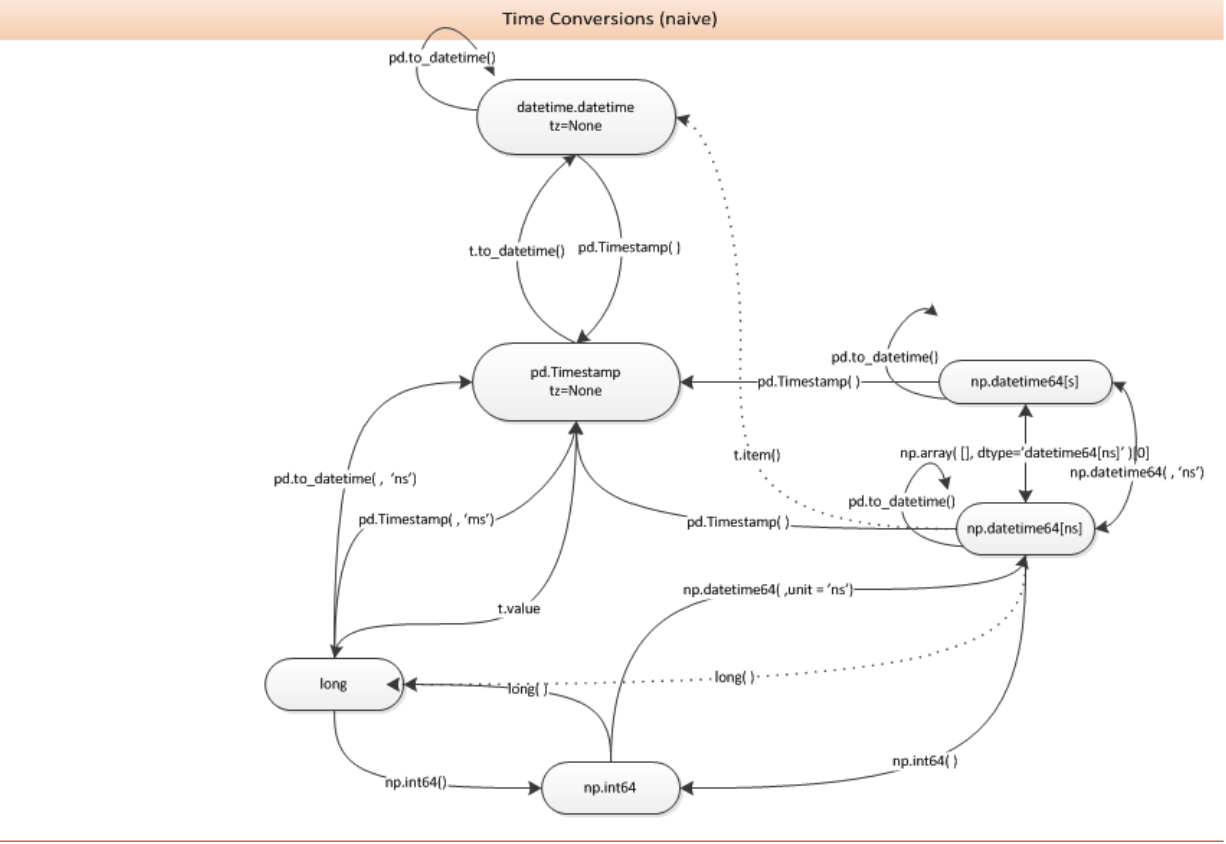

however, it's really complicated

datetime.datetime 是 Python 标准库中的原生日期时间对象，简单易用。

pandas.Timestamp 扩展了 datetime.datetime，为 pandas 数据操作提供了更强大的功能，是处理时间序列数据的首选。

numpy.datetime64 则注重高效的数组操作，适合在大规模数据分析和计算中使用。

这些型别之间的相互兼容性使得 pandas 可以灵活处理各种日期时间数据，但也可能导致在不同情境下处理和转换时产生一些复杂性。


## 3. **`Pendulum`  `pandas` 和 `datetime` 的關係**

* **`Pendulum` 与 `datetime`**:
    * `Pendulum` 继承並擴展了 `datetime` 模组中的 `datetime` 和 `timedelta` 物件。`Pendulum` 的 `DateTime` 和 `Duration` 類別是對 `datetime.datetime` 和 `datetime.timedelta` 的增強版本。
    * `Pendulum` 保持了和 `datetime` 的兼容性，因此可以在需要與其他依赖 `datetime` 的套件（如 `pandas`）进行互操作时無缝集成。
* **`Pendulum` 与 `pandas`**:
    * `pandas` 主要使用 `Timestamp` 和 `Timedelta` 来处理日期時間数据，这些類別在功能上類似于 `Pendulum` 的 `DateTime` 和 `Duration`。雖然 `pandas` 没有直接 based on  `Pendulum`，但可以轻松地將 `Pendulum` 物件转轉換 `pandas` 物件，进行数据分析和操作。
    * 例如，可以將 `Pendulum` 的 `DateTime` 物件转为 `pandas.Timestamp` 物件，继续在 `pandas` DataFrame 中使用：
        
        ```python
        import pendulum
        import pandas as pd
        
        dt = pendulum.now()
        pd_timestamp = pd.Timestamp(dt.to_datetime_string())
        ```
        
* **与其他日期时间套件的關係**:
    * `Pendulum` 還通過簡化 API 和增强功能与其他日期时间套件（如 `arrow` 和 `dateutil`）競爭，成为開發者的首選工具。


`Pendulum` 作为 `datetime` 的增強版本，在解决标准库在時區處理、時間操作和日期解析上的不足。它和 `pandas` 和 `datetime` 保持了良好的兼容性，提供了更易用的 API 和更强大的功能，成为处理日期時間数据的一个有力工具。